# Test run 

- Test running csv data through census

- Commands for switching between pandas and sql in a databricks notebook

In [ ]:
%sql
CREATE TEMPORARY VIEW diam
--ALTER VIEW diam
    AS  
SELECT * FROM `hive_metastore`.`default`.`diamonds`;
SELECT distinct cut, round(avg(carat),2) as AverageCarat
FROM diam 
group by cut
;

cut AverageCarat Premium 0.89 Ideal 0.7 Good 0.85 Fair 1.05 Very Good 0.81

In [ ]:
%sql
--Use hive format
SELECT * FROM `hive_metastore`.`default`.`batch`;

id address1 city state zip 1 4600 Silver Hill Rd Suitland MD 20746 2 79 Wistful Vista Peoria IL 61604 3 3 Gramercy Park West New York NY 10003 3B 3 Gramercy Park West New York NY null 3C 3 Gramercy Park West null null 10003 4A 2711 4th St NW Albuquerque NM 87107 4B 346 W 600 S Salt Lake City Utah 84101

In [ ]:
import pandas as pd
#url = ('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv')
df = (_sqldf)
display(df)

id address1 city state zip 1 4600 Silver Hill Rd Suitland MD 20746 2 79 Wistful Vista Peoria IL 61604 3 3 Gramercy Park West New York NY 10003 3B 3 Gramercy Park West New York NY null 3C 3 Gramercy Park West null null 10003 4A 2711 4th St NW Albuquerque NM 87107 4B 346 W 600 S Salt Lake City Utah 84101

In [ ]:
import numpy as np

# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark_df = df.pandas_api()
print(type(spark_df))
display(spark_df)

<class 'pyspark.pandas.frame.DataFrame'>


id address1 city state zip 1 4600 Silver Hill Rd Suitland MD 20746 2 79 Wistful Vista Peoria IL 61604 3 3 Gramercy Park West New York NY 10003 3B 3 Gramercy Park West New York NY null 3C 3 Gramercy Park West null null 10003 4A 2711 4th St NW Albuquerque NM 87107 4B 346 W 600 S Salt Lake City Utah 84101

In [ ]:
df.createOrReplaceTempView("cens")
df2 = df.filter(df.state == 'IL')
df2.createOrReplaceTempView("cens")
display(spark.sql("""
                select * from cens
                """))
#sorted(df3.collect()) == sorted(df2.collect())
#display(df3)
#spark.catalog.dropTempView("people")

id address1 city state zip 2 79 Wistful Vista Peoria IL 61604

In [ ]:
df4=(spark.sql("""
                select * from cens
                """))
display(df4)                

id address1 city state zip 2 79 Wistful Vista Peoria IL 61604

plot


<AxesSubplot:>

data


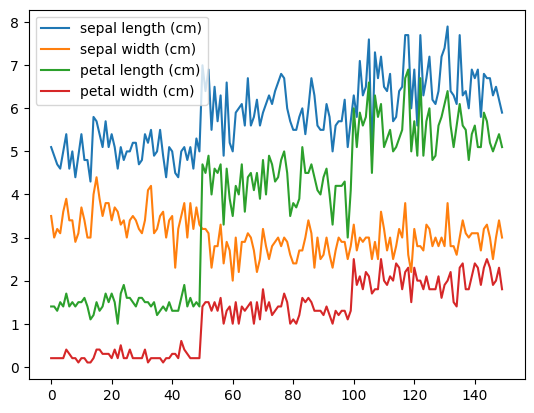

In [ ]:
from sklearn.datasets import load_iris
pd.set_option('display.max_rows', 5)
data = load_iris()
iris = pd.DataFrame(data=data.data, columns=data.feature_names)
ax = iris.plot()
print("plot")
display(ax)
print("data")
#display(iris)
iris.to_parquet(r'/Workspace/Users/[]/data/irisparquet.parquet', index=False)

In [ ]:
import pandas as pd
import numpy as np
#%pip install censusgeocode
from censusgeocode import CensusGeocode
import censusgeocode as cg
cg = CensusGeocode(benchmark='Public_AR_Current', vintage='Census2020_Current')

cg.coordinates(x=-76, y=41)
cg.onelineaddress('1600 Pennsylvania Avenue, Washington, DC')

#df = _sqldf
#df = pd.read_csv(r'/Workspace/Users/[]/data/batch.csv')
dfo = cg.addressbatch('/Workspace/Users/[]/data/batch.csv')
df=pd.DataFrame(dfo)
df.to_csv(r'/Workspace/Users/[]/data/out.csv', index=False)
display(df)

id address match matchtype parsed tigerlineid side statefp countyfp tract block lat lon 3C 3 Gramercy Park West, , , 10003 true Exact 3 GRAMERCY PARK W, NEW YORK, NY, 10003 59653655 R 36 061 005000 5002 40.73832546500006 -73.98657723299993 1 4600 Silver Hill Rd, Suitland, MD, 20746 false null null null null null null null null null null 2 79 Wistful Vista, Peoria, IL, 61604 false null null null null null null null null null null 3 3 Gramercy Park West, New York, NY, 10003 true Exact 3 GRAMERCY PARK W, NEW YORK, NY, 10003 59653655 R 36 061 005000 5002 40.73832546500006 -73.98657723299993 4A 2711 4th St NW, Albuquerque, NM, 87107 true Exact 2711 4TH ST NW, ALBUQUERQUE, NM, 87107 206708141 L 35 001 002900 1011 35.112019142000065 -106.64637726199999 4B 346 W 600 S, Salt Lake City, Utah, 84101 true Exact 346 W 600 S, SALT LAKE CITY, UT, 84101 176067070 R 49 035 114000 3018 40.75630099000006 -111.90128884699999 3B 3 Gramercy Park West, New York, NY, true Exact 3 GRAMERCY PARK W, NEW YORK, NY, 10003 59653655 R 36 061 005000 5002 40.73832546500006 -73.98657723299993

In [ ]:
df.describe()

lat         lon
count   5.000000    5.000000
mean   39.616659  -88.101480
std     2.518182   19.416717
min    35.112019 -111.901289
25%    40.738325 -106.646377
50%    40.738325  -73.986577
75%    40.738325  -73.986577
max    40.756301  -73.986577